In [2]:
import pandas as pd
import numpy as np

import json
import os


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

In [3]:

# for date and time
from datetime import datetime 
from tqdm import tqdm
# graphs


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [4]:
import torch
import torch.nn as nn

# torch dataloaders
import torch.functional as f
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split

In [5]:
price_data = pd.read_csv('..\prices\\bq-results-20230414-210836-1681506532204.csv')
price_data.head()

ds    symbol      close    volume
0  2016-03-11  HYDRA.AS  33.009998       345
1  2016-03-11      SMLR   1.530000     16658
2  2016-03-14       CVA  16.520000   1075159
3  2016-03-14      NFLX  98.130000  11251874
4  2016-03-15   2882.HK   4.760000      4200

In [6]:
len( price_data.symbol.unique() )

14021

In [7]:
price_data.shape

(15287374, 4)

In [8]:
price_data_2 = pd.read_csv('..\prices\\bq-results-20230414-205924-1681505974800.csv')
price_data_2.head()

ds symbol  close  volume
0  1992-02-28    AFL    2.0  609000
1  1992-02-03    WDC    2.0  250200
2  1992-02-03   FACO    2.0   18600
3  1992-02-21   FICO    2.0  783000
4  1992-02-03  MOG-A    2.0    2363

In [9]:
price_data_2_date_time = pd.to_datetime( price_data_2['ds'] )

In [10]:
( price_data_2.symbol == 'SMLR' ).sum()

0

In [15]:
price_folder_path = '..\prices\\'
price_datasets = {}

for i,paths in enumerate(os.listdir(price_folder_path)):
    dataset_path = os.path.join(price_folder_path, paths)
    price_datasets[i] = pd.read_csv(dataset_path)

In [47]:
''' Time consuming don't run it again and again '''

# unique_symbol_matrix = {}

# for i in tqdm(range(len(price_datasets))):

#     comparing_company = price_datasets[i]['symbol']
#     unique_symbol_matrix[i] = []

#     for j in range( i, len(price_datasets) ):
#         unique_symbol_matrix[i].append( bool(len( set(comparing_company).intersection(set(price_datasets[j]['symbol'])) )) )


" Time consuming don't run it again and again "

In [16]:
set( price_datasets[0]['symbol'] ).intersection(set( price_datasets[1]['symbol'] )) 

{'GBG.L',
 'JPM',
 'JBL',
 'PRK',
 'CPE',
 'LHX',
 'FRPH',
 'NHC',
 'RYN',
 'SDG.L',
 'SMP',
 'REG',
 'CERN',
 'SXS.L',
 'SMIT',
 'MAT',
 'AEF',
 'BKR',
 'SJW',
 'J',
 'SNX.L',
 'KSU',
 'CLFD',
 'RHP',
 'SIGI',
 'IPG',
 'MCEM',
 'LAM.TO',
 'BNSO',
 'GF',
 'VASO',
 'RDI',
 'NX',
 'BMTC',
 'TEF',
 'CCFN',
 'BRWM.L',
 'IEP',
 'ROP',
 'PDEX',
 'TCBK',
 'TTG.L',
 'OSUR',
 'KR',
 'PHI.L',
 'CARV',
 'MWY.L',
 'OKE',
 'PHTM.L',
 'PCG-PA',
 'GAW.L',
 'PPC',
 'UKML.L',
 'RVSB',
 'USEG',
 'BTO',
 'HRB',
 'TSN',
 'HQH',
 'TTI',
 'MNP.L',
 'CPK',
 'MLAB',
 'SCHL',
 'CRWS',
 'VCV',
 'DORM',
 'BKT',
 'AEM',
 'SAL',
 'SPX.L',
 'ELCO.L',
 'NEU',
 'CRK',
 'DWSN',
 'KOPN',
 'SONY',
 'ALX',
 'KBH',
 'TM',
 'ETN',
 'IDIP.PA',
 'JNJ',
 'ECM.L',
 'SPDC',
 'VIRC',
 'RAT.L',
 'ATGE',
 'BMO',
 'HDSN',
 'ADX',
 'STRS',
 'XEL',
 'ITIC',
 'NNN',
 'GAM',
 'TROW',
 'BA',
 'N4P.L',
 'MBI',
 'MDC',
 'WPP',
 'HAS',
 'ABCB',
 'APTD.L',
 'NEM',
 'MPV',
 'DSS',
 'MRCH.L',
 'ROK',
 'DNP',
 'GSK',
 'VFC',
 'GFI',
 'EQC',
 '

In [17]:
total_df_list = list(price_datasets.values())
combined_df = pd.concat(total_df_list, ignore_index = True )

In [18]:
print( f" total rows in the combined dataset = {combined_df.shape[0]*1e-6:.2f} M" )

 total rows in the combined dataset = 59.96 M


In [19]:
unique_symbols = combined_df.symbol.unique()

In [20]:
print(f" total number of unique symbols : {len(unique_symbols)} ")

 total number of unique symbols : 17446 


In [21]:
combined_df[ combined_df['symbol'] == unique_symbols[0] ].to_csv(f'{unique_symbols[0]}_dataset.csv')

In [22]:
def get_graph( time, stocks, volume, company_name ):
    
    # need to give the sorted date
    fig, ax = plt.subplots( figsize = (20,12) )
    ax.locator_params(axis = 'x' , nbins=4)
    plt.title(f" stock prices vs date ")
    ax.plot(time, stocks, label = f'{company_name}' )
    ax.legend( loc = 'best' )
    plt.ylabel('price')
    ax.xaxis.set_major_locator( mdates.YearLocator() )
    ax.xaxis.set_major_formatter( mdates.DateFormatter('%Y') )

    # ax.xaxis.set_major_formatter(
    # mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()) ) 

    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.show()

    # need to give the sorted data
    fig, ax = plt.subplots( figsize = (20, 12) )
    plt.title(f" volume vs date ")
    ax.plot(time, volume ,label = f'{company_name}',  )
    ax.legend( loc = 'best' )
    plt.ylabel('volume_size')
    ax.xaxis.set_major_locator( mdates.YearLocator() )
    ax.xaxis.set_major_formatter( mdates.DateFormatter('%Y') )
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))

    plt.show()


In [23]:
def visualize_data(name, df = combined_df):

    company_df = df[ df['symbol'] == name ]
    company_df['ds']= pd.to_datetime( company_df['ds'] )

    # sorting values based on datetime
    company_df = company_df.sort_values('ds')

    # Now getting the graph for the company
    get_graph(time = company_df['ds'].tolist() , stocks = company_df['close'].tolist(), volume = company_df['volume'].tolist(), company_name = name )
    

C:\Users\dell\AppData\Local\Temp\ipykernel_21176\94741093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['ds']= pd.to_datetime( company_df['ds'] )


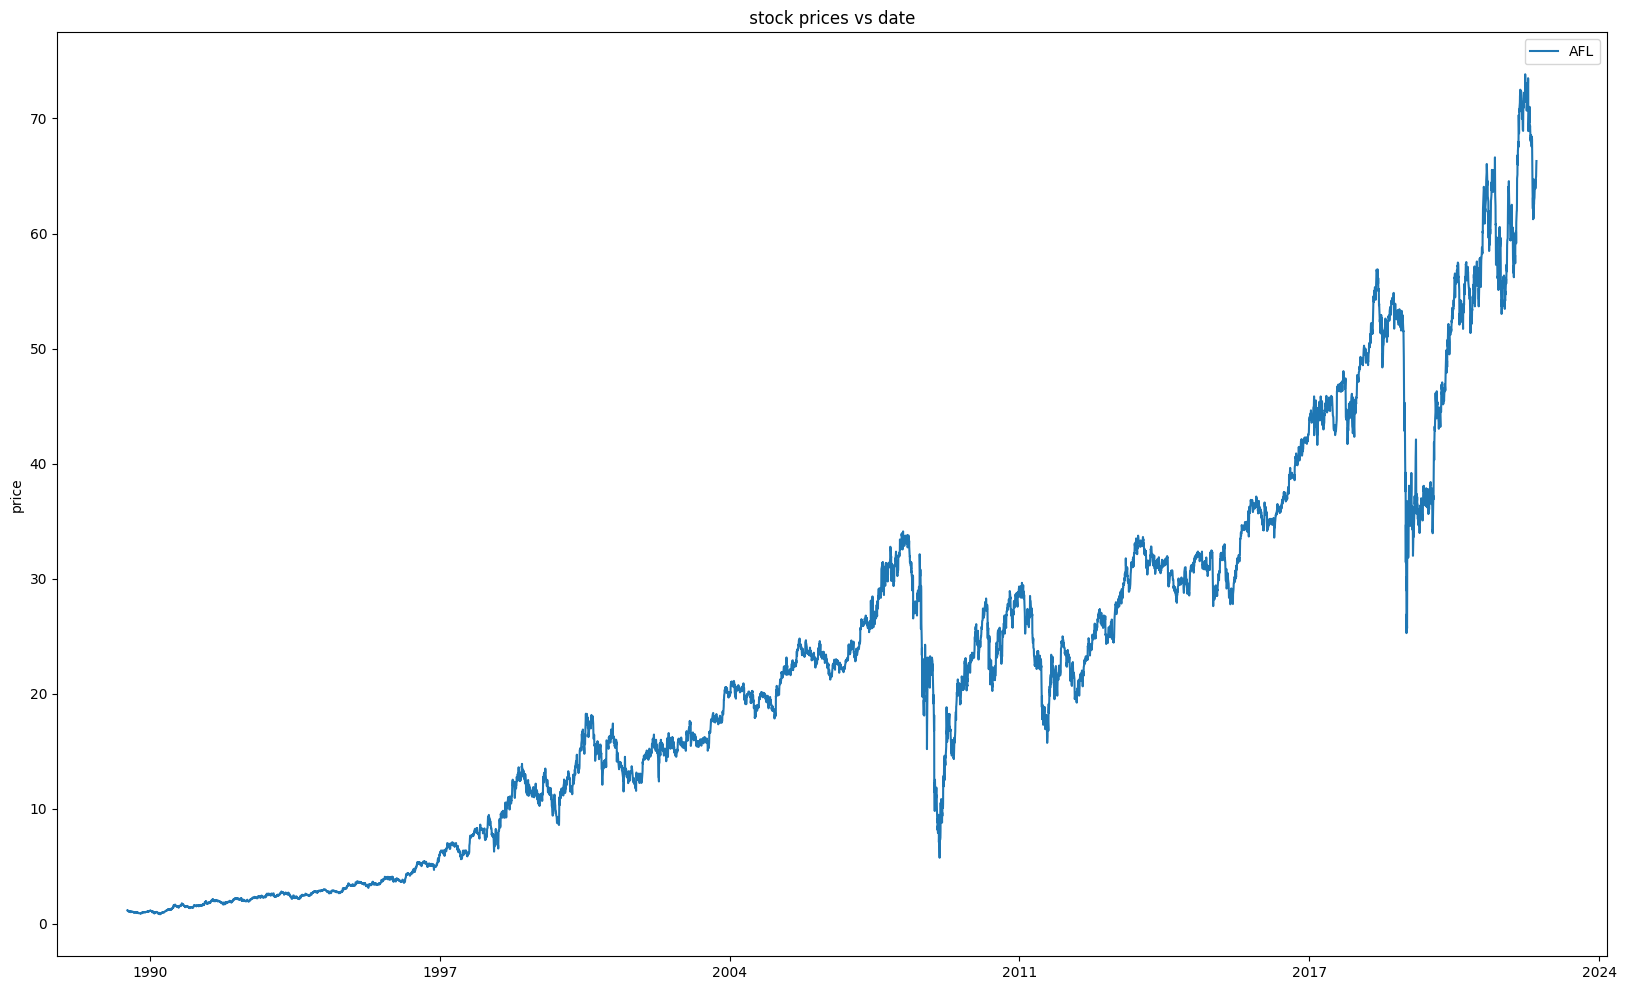

In [25]:
visualize_data( name = unique_symbols[0] , df = combined_df )

## RNN for stock prediction

### Data preparation

In [556]:
def prepare_data( company_names ):
    
    collected_data = {}

    for i,v in tqdm(enumerate(company_names)):

        data = combined_df[ combined_df['symbol'] == v ].sort_values('ds')
        data.index = list(range(len(data)))
        data = pd.DataFrame( data , index = list(range(len(data))) )

        new_features = np.array( [ list(data.loc[i-100:i, 'close']) for i in range(100,len(data)) ] )
        new_label =  np.array( data.loc[100:, 'ds'] ).reshape(-1,1)

        # print(combined_df[ combined_df['symbol'] == v ])
        # ll

        # print(new_features, new_label.shape, data.shape, data.loc[100:, 'ds'].shape )
        # ll

        rnn_data = pd.DataFrame( np.append( new_label, new_features, axis = 1) , columns = ['label'] + list(range(1,101) ) + ['target']  )

        collected_data[v] = rnn_data

    return collected_data

In [557]:
companies_data = prepare_data( unique_symbols[:5] )

5it [00:15,  3.17s/it]


In [558]:
companies_data['AFL'].sort_values('label')

label         1         2         3         4         5         6  \
0     1990-05-24     1.175      1.15     1.125     1.125  1.141667  1.133333   
1     1990-05-25      1.15     1.125     1.125  1.141667  1.133333  1.091667   
2     1990-05-29     1.125     1.125  1.141667  1.133333  1.091667  1.133333   
3     1990-05-30     1.125  1.141667  1.133333  1.091667  1.133333       1.1   
4     1990-05-31  1.141667  1.133333  1.091667  1.133333       1.1       1.1   
...          ...       ...       ...       ...       ...       ...       ...   
8280  2023-04-06     69.97      70.3     68.71     70.23     70.81     70.59   
8281  2023-04-10      70.3     68.71     70.23     70.81     70.59     70.94   
8282  2023-04-11     68.71     70.23     70.81     70.59     70.94     71.37   
8283  2023-04-12     70.23     70.81     70.59     70.94     71.37     71.99   
8284  2023-04-13     70.81     70.59     70.94     71.37     71.99      72.0   

             7         8         9  ...        92        93        94  \
0     1.091667  1.133333       1.1  ...  1.016667  0.991667     1.025   
1     1.133333       1.1       1.1  ...  0.991667     1.025  1.016667   
2          1.1       1.1  1.066667  ...     1.025  1.016667  1.016667   
3          1.1  1.066667  1.058333  ...  1.016667  1.016667       1.0   
4     1.066667  1.058333  1.058333  ...  1.016667       1.0  1.016667   
...        ...       ...       ...  ...       ...       ...       ...   
8280     70.94     71.37     71.99  ...     62.88     63.11     63.56   
8281     71.37     71.99      72.0  ...     63.11     63.56     64.29   
8282     71.99      72.0      72.5  ...     63.56     64.29     64.29   
8283      72.0      72.5     70.99  ...     64.29     64.29     64.52   
8284      72.5     70.99     70.88  ...     64.29     64.52     64.66   

            95        96        97        98        99       100    target  
0     1.016667  1.016667       1.0  1.016667  1.016667       1.0       1.0  
1     1.016667       1.0  1.016667  1.016667       1.0       1.0  0.991667  
2          1.0  1.016667  1.016667       1.0       1.0  0.991667  1.033333  
3     1.016667  1.016667       1.0       1.0  0.991667  1.033333  1.016667  
4     1.016667       1.0       1.0  0.991667  1.033333  1.016667  1.008333  
...        ...       ...       ...       ...       ...       ...       ...  
8280     64.29     64.29     64.52     64.66     63.91     64.46     64.56  
8281     64.29     64.52     64.66     63.91     64.46     64.56     64.97  
8282     64.52     64.66     63.91     64.46     64.56     64.97     65.71  
8283     64.66     63.91     64.46     64.56     64.97     65.71     65.98  
8284     63.91     64.46     64.56     64.97     65.71     65.98      66.3  

[8285 rows x 102 columns]

In [559]:
combined_df[combined_df['symbol'] == 'AFL']

ds symbol      close     volume
0         1992-02-28    AFL   2.000000   609000.0
1492      1993-10-13    AFL   2.562500  1180800.0
3175      1992-03-10    AFL   1.950000  2941500.0
3241      1992-03-27    AFL   1.833333  2800500.0
8001      1990-10-05    AFL   0.875000  2127000.0
...              ...    ...        ...        ...
59885944  2021-07-26    AFL  53.700000  1846104.0
59894355  2022-02-24    AFL  59.620000  4712819.0
59922112  2022-03-10    AFL  59.960000  2485118.0
59926640  2020-10-16    AFL  37.210000  2800042.0
59928503  2022-04-13    AFL  64.990000  1842300.0

[8385 rows x 4 columns]

In [560]:
unique_symbols[:5]

array(['AFL', 'WDC', 'FACO', 'FICO', 'MOG-A'], dtype=object)

In [561]:
class Create_Dataset(Dataset):

    def __init__(self, data, target):
        self.data = data.reshape(len(data) ,-1, 1 ) 
        self.target = target.reshape(-1,1)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return torch.tensor(self.data[index], dtype = torch.float32), torch.tensor(self.target[index], dtype = torch.float32)

In [562]:
def create_dataloader(companies_data = companies_data, batch_size = 108, shuffle = True):
    
    company_train_dataloader = {}
    company_val_dataloader = {}

    for i,v in tqdm(zip(companies_data.keys(), companies_data.values())):

        # print(v.shape)
        # ll

        train, val, y_train, y_val = train_test_split( v.drop(['label','target'], axis = 1, inplace = False ),
                                               v['target'], 
                                               test_size = 0.15,
                                               shuffle = shuffle,
                                               random_state = 12
                                               )
        
        train_dataset = Create_Dataset(data = np.array(train, dtype = np.float32), target = np.array(y_train, dtype = np.float32))
        val_dataset = Create_Dataset(data = np.array(val, dtype = np.float32), target = np.array(y_val, dtype = np.float32))

        train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = shuffle, drop_last = False)
        val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = shuffle, drop_last = False)

        company_train_dataloader[i] = train_dataloader
        company_val_dataloader[i] = val_dataloader
    
    return company_val_dataloader, company_train_dataloader

In [577]:
companies_val_dataloader , companies_train_dataloader = create_dataloader(shuffle=False)

5it [00:00, 17.23it/s]


In [578]:
len( companies_train_dataloader['AFL'] )

66

#### Model creation

In [565]:
class Stock_prediction(nn.Module):

    def __init__(self, input_channels, hidden_size, output_channels, num_layers = 1 ):

        super(Stock_prediction, self).__init__()

        self.input_size = input_channels
        self.output_size = output_channels
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.LSTM_layer = nn.LSTM( self.input_size, self.hidden_size , num_layers = 1, batch_first = True )
    
        self.dense_layer = nn.Sequential(

                nn.Linear(self.hidden_size, self.hidden_size),
                nn.ReLU(),
                nn.Linear(self.hidden_size, self.hidden_size),
                nn.ReLU(),
                
                nn.Linear(self.hidden_size, self.output_size),
            )
        
    def initialize_h0(self, dim, device):

        self.h0,self.c0  =  ( torch.zeros(self.num_layers, dim ,self.hidden_size, requires_grad= True, dtype = torch.float32 ).to(device),
                        torch.zeros(self.num_layers, dim ,self.hidden_size, requires_grad= True, dtype = torch.float32 ).to(device) )
    

    def forward(self, x):
        self.initialize_h0( x.size(0) , device = x.device )
        out, (hn,cn) = self.LSTM_layer( x, (self.h0,self.c0) )

        if self.dense_layer is not None:
            output = self.dense_layer( hn[0] )

        else: output = hn

        # raise Exception(f" printing hn shape : {hn.shape} and output shape : {output} and ")
        
        return output

In [566]:
# hyper parameters:

lr = 1e-4
epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 768

optimizer = torch.optim.Adam
optimizer_params = {'lr' : lr, }

In [567]:
def R2_Score(pred, target):
    pred = pred.detach().cpu().numpy().reshape(-1)
    target = target.detach().cpu().numpy().reshape(-1)
    return r2_score(target, pred)*100

In [568]:
company_names = unique_symbols[:5]
models = {}

for i in company_names :
    models[i] = Stock_prediction(1,200,1)
print(f" total params in the model is : {sum([p.numel() for p in models[i].parameters() if p.requires_grad ])*1e-3:.3f} K")

 total params in the model is : 243.001 K


### training model

In [569]:
class LSTM_Trainer():

    def __init__(self, name, model, train_dataloader, val_dataloader ,optimizer = optimizer , optimizer_params = optimizer_params,  ):

        # initializing models
        self.name = name
        self.model = model
    
        self.train_dataloader = train_dataloader
        # self.test_dataloader = test_dataloader
        self.val_dataloader = val_dataloader
        self.optimizer_params = optimizer_params

        # self.train_len  =  len(train)
        # self.validation_len = len(val)

        # optimizers and loss fn
        self.optimizer = {}

        for key,models in zip(self.model.keys(), self.model.values()):
            self.optimizer[key] = optimizer(models.parameters(), **optimizer_params) 

        self.loss = nn.MSELoss()
    
    def eval(self,name, evaluation_fn = R2_Score ):

        epoch_loss = 0
        epoch_metric = 0

        loop_obj = tqdm( enumerate( self.val_dataloader[name] ), total = len(self.val_dataloader[name]), desc = 'val epoch progress' )

        with torch.cuda.amp.autocast() and torch.no_grad() :
            validation_len = 0

            for index,batch in loop_obj:
                    
                    data,target = batch

                    # changing type and data type of the image to ensure computability
                    data = data.to(device).type(torch.float32)
                    target = target.to(device).type(torch.float32)

                    # getting the prediction from the model
                    pred = self.model[name](data)

                    # computing loss
                    Loss = self.loss(pred, target)

                    # calculating loss
                    epoch_loss += Loss.item()*len(data)
                    epoch_metric += evaluation_fn( pred , target )*len(data)

                    loop_obj.set_description(f" Val Loss of model {name} : {Loss} ", refresh = True)

                    # increasing val len
                    validation_len += len(data)
        
        return epoch_loss/validation_len , epoch_metric/validation_len

    def train_model(self, company_names = unique_symbols[:5] , epochs = 15 , print_freq = 10, save_freq = 500, evaluation_fn =  R2_Score ):

        train_loss = []
        train_metric = []

        val_loss = []
        val_metric = []

        # with torch.cuda.amp.autocast():

        if epochs > 0:

            for e in range(epochs):

                epoch_loss = 0
                epoch_metric = 0
                name = np.random.choice(company_names, size = 1)[0]
                
                train_len = 0

                loop_obj = tqdm( enumerate(self.train_dataloader[name]), total = len(self.train_dataloader[name]), desc = 'train epoch progress' )

                for index,batch in loop_obj:

                    data,target = batch

                    # zero_grad optimizer to erase previous gradients
                    self.optimizer[name].zero_grad()

                    # changing type and data type of the data to ensure computability
                    data = data.to(device).type(torch.float32)
                    target = target.to(device).type(torch.float32)

                    # getting the prediction from the model
                    # print(data)
                    pred = self.model[name].train().to(device)(data)

                    # print(pred.shape, target.shape )

                    # computing loss
                    Loss = self.loss(pred, target)

                    # raise Exception(f" Checking the size of the loss : {Loss} ")
                    loop_obj.set_description(f" Train Loss of model {name} : {Loss} ", refresh = True)

                    # updating weights
                    Loss.backward()
                    self.optimizer[name].step()

                    # calculating loss
                    epoch_loss += Loss.item()*len(data)
                    epoch_metric += evaluation_fn( pred, target )*len(data)

                    # increasing train_len
                    train_len += len(data)
                
                # Now storing the Loss and metric of every epoch
                train_loss.append( epoch_loss/train_len )
                train_metric.append( epoch_metric/train_len )

                # Now storing the value of val loss and val metric
                validation_data = self.eval(name)

                # Now storing them in the validation history
                val_loss.append(validation_data[0])
                val_metric.append(validation_data[1])

                if (e+1) % print_freq == 0  :

                    print(f"\n=====================================================")
                    print(f" The current epoch is : {e+1}")
                    print(f" current company is : {name}")
                    print(f" Train Loss is : {train_loss[-1]:.3f}")
                    print(f" Train R2 Score is : {train_metric[-1]:.3f}")
                    print(f" Validation Loss is : {validation_data[0]:.3f}")
                    print(f" Validation R2 Score is : {validation_data[1]:.3f}")
                    print(f"=====================================================\n")
                
                if (e+1) % save_freq == 0  :
                    print(f"\n Model got saved in epoch : {e} ")

                    if os.path.exists(f'saved_model/{name}/'):
                        torch.save(self.model[name].state_dict(), f'saved_model/{name}/{e}.pt')
                    else:
                        os.mkdir(f'saved_model/{name}/')
                        torch.save(self.model[name].state_dict(), f'saved_model/{name}/{e}.pt')
             
        return [np.array(train_loss), train_metric, np.array(val_loss), val_metric]
    
    
    def plot_data(self, train_loss, train_metric, val_loss, val_metric,):
        
        plt.figure(figsize = (20,18) )

        plt.subplot(3,2,1)

        plt.plot(train_loss, label = f'train_loss - MSE Loss')
        plt.title(f'train loss ')
        plt.xlabel('epochs')
        plt.ylabel('train_loss')
        plt.legend(loc = 'best')

        plt.subplot(3,2,2)

        plt.plot(val_loss, label = f'val_loss - MSE loss')
        plt.title(f'val loss ')
        plt.xlabel('epochs')
        plt.ylabel('val_loss')
        plt.legend(loc = 'best')

        plt.subplot(3,2,3)

        plt.plot(train_loss**0.5, label = f'train_loss - RMSE Loss')
        plt.title(f'train loss ')
        plt.xlabel('epochs')
        plt.ylabel('train_loss')
        plt.legend(loc = 'best')

        plt.subplot(3,2,4)

        plt.plot(val_loss**0.5, label = f'val_loss - RMSE loss')
        plt.title(f'val loss ')
        plt.xlabel('epochs')
        plt.ylabel('val_loss')
        plt.legend(loc = 'best')

        plt.subplot(3,2,5)

        plt.plot( np.clip( np.array(train_metric), -1, 100 ), label = f'train_metric - R2 score ')
        plt.title(f'train metric')
        plt.xlabel('epochs')
        plt.ylabel('train_metric')
        plt.legend(loc = 'best')

        plt.subplot(3,2,6)

        plt.plot( np.clip( np.array(val_metric) , -1, 100), label = f'val_metric - R2 score')
        plt.title(f'val metric')
        plt.xlabel('epochs')
        plt.ylabel('val_metric')
        plt.legend(loc = 'best')

        plt.show()


In [570]:
trainer = LSTM_Trainer( 'RNN_MODEL_3', models, companies_train_dataloader, companies_val_dataloader, )

In [572]:
data = trainer.train_model(epochs = 30, company_names = unique_symbols[:5] )

 Val Loss of model WDC : 2.398409843444824 : 100%|██████████| 12/12 [00:00<00:00, 96.52it/s] 



 The current epoch is : 10
 current company is : WDC
 Train Loss is : 2.926
 Train R2 Score is : 99.607
 Validation Loss is : 2.729
 Validation R2 Score is : 99.649



 Val Loss of model MOG-A : 1.9190160036087036 : 100%|██████████| 12/12 [00:00<00:00, 68.79it/s]



 The current epoch is : 20
 current company is : MOG-A
 Train Loss is : 4.230
 Train R2 Score is : 99.497
 Validation Loss is : 3.156
 Validation R2 Score is : 99.611



 Val Loss of model WDC : 1.2535592317581177 : 100%|██████████| 12/12 [00:00<00:00, 61.30it/s]


 The current epoch is : 30
 current company is : WDC
 Train Loss is : 1.563
 Train R2 Score is : 99.786
 Validation Loss is : 1.545
 Validation R2 Score is : 99.801



***`Training Done`***

### testing Model

In [595]:
class test_model(): 

    def __init__(self, model, test_dataloader  ) :

        self.model = model
        self.test_dataloader = test_dataloader
    
    def get_prediction(self, companies, save_path = None,  ):

        # to store numpy array of predicted masks
        prediction = []
        truth_target = []

        self.test_prediction = {}
        self.truth_target = {}

        with torch.no_grad():

            for i,company in enumerate(companies):

                loop_obj = tqdm( enumerate(self.test_dataloader[company]), desc = f'test images {company}' , total = len(self.test_dataloader[company]) )

                for index,batch in loop_obj :

                    data,truth = batch

                    # changing type and data type of the data to ensure computability
                    data = data.to(device).type(torch.float32)

                    predicted_target = self.model[company].eval().to(device)(data) 

                    prediction.append( predicted_target.detach().cpu().numpy().squeeze(1) )
                    truth_target.append( truth.detach().cpu().numpy().squeeze(1) )

                    # print(masks[0].shape)
                    # break
        
                self.test_prediction[company] = np.concatenate(prediction)
                self.truth_target[company] = np.concatenate(truth_target)

        return self.test_prediction,self.truth_target
    
    def get_new_points(self, name, model, last_point, points_before, val_dataloader, n_steps = 100, plot = False ):
        
        prediction = []

        model = model[name]

        with torch.no_grad() :

            for i in range(n_steps):

                # print(last_point.unsqueeze(0).shape)
                pred =  model.eval().to(device)( last_point.unsqueeze(0).to(device) )
                last_point = last_point[1:]
                last_point = torch.cat((last_point.to(device), pred), 0) 

                # appending the prediction
                prediction.append(pred.item())
        
        total_points = np.concatenate([points_before, np.array(prediction)] )

        ''' Predicting confidence '''

        loop_obj = tqdm( enumerate(val_dataloader[name]), desc = f'testing {name}' , total = len(val_dataloader[name]) )
        truth_target = []
        prediction  = []

        for index,batch in loop_obj :

                data,truth = batch

                # changing type and data type of the data to ensure computability
                data = data.to(device).type(torch.float32)

                predicted_target = model.eval().to(device)(data) 

                prediction.append( predicted_target.detach().cpu().numpy().squeeze(1) )
                truth_target.append( truth.detach().cpu().numpy().squeeze(1) )

                # print( prediction[0] )
                # jj

                # print(masks[0].shape)
                # break
    
        final_prediction = np.concatenate(prediction)
        truth_target = np.concatenate(truth_target)

        conf = r2_score(truth_target,final_prediction)*100

        print(f" Confidence score is : {conf:.2f} ")

        if plot:
            plt.figure( figsize=(20,12) )
            plt.plot(total_points ,label = f'predicted values {name} with confidence {conf:.2f}', color = 'orange' )
            plt.plot( points_before ,label = f'truth values of {name}', color = 'blue')
            plt.legend( loc = 'best')
            plt.title(' newly predicted trend ')
            plt.ylabel('price')
            plt.show()

        return total_points, prediction
    
    def plot_prediction(self,  companies, company_pred, company_truth, n = 100):
        
        for name in companies:
            
            truth = company_truth[name]
            pred = company_pred[name]

            if n == 'all' : indexes = np.array( list(range(0,len(truth))) )
            else : indexes = np.random.randint(0, len(truth), size = n, )

            print('************************************************************************')
            print(f" Company name is : '{name}' ")
            print(f" r2_score of the test data of company  {name} is : {r2_score(truth,pred)*100:.2f} ")
            print(f" Mean Squared Error of the test data company  {name} is : {mean_squared_error(truth,pred):.2f}")
            print(f" Root Mean Squared Error of the test data company  {name} is : {mean_squared_error(truth,pred)**0.5:.2f}")
            print('************************************************************************')

            print(f" plotting goodness of fit of the test data with the given model of the random '{n}' data ")

            plt.figure( figsize=(20,12) )
            plt.plot(truth[indexes] ,label = f'truth values of {name}', color = 'blue')
            plt.plot(pred[indexes] ,label = f'predicted values {name} ', color = 'orange' )
            plt.legend( loc = 'best')
            plt.title(' predicted vs truth of test data ')
            plt.xlabel('price')
            plt.show()

In [596]:
test_company_name = unique_symbols[4]

Tester = test_model(model = models, test_dataloader = companies_val_dataloader )

In [597]:
test_prediction = Tester.get_prediction(unique_symbols[:5])

test images MOG-A: 100%|██████████| 12/12 [00:00<00:00, 109.59it/s]


************************************************************************
 Company name is : 'AFL' 
 r2_score of the test data of company  AFL is : 98.20 
 Mean Squared Error of the test data company  AFL is : 1.61
 Root Mean Squared Error of the test data company  AFL is : 1.27
************************************************************************
 plotting goodness of fit of the test data with the given model of the random 'all' data 


************************************************************************
 Company name is : 'WDC' 
 r2_score of the test data of company  WDC is : 98.08 
 Mean Squared Error of the test data company  WDC is : 2.37
 Root Mean Squared Error of the test data company  WDC is : 1.54
************************************************************************
 plotting goodness of fit of the test data with the given model of the random 'all' data 


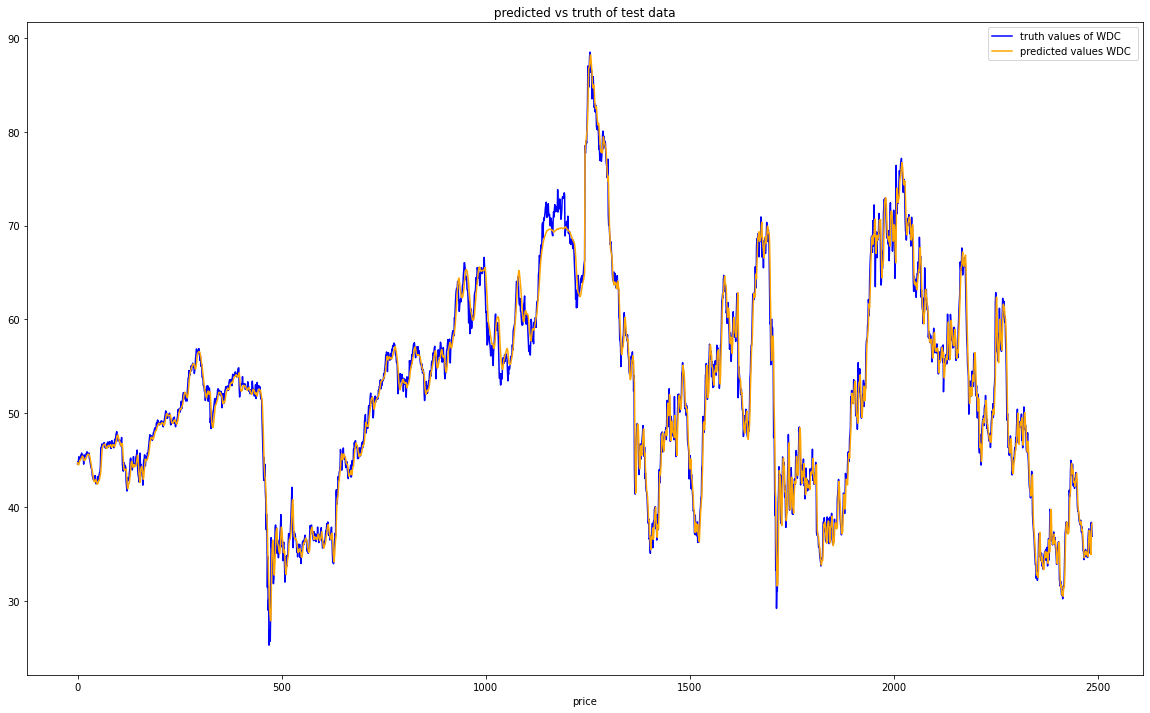

************************************************************************
 Company name is : 'FACO' 
 r2_score of the test data of company  FACO is : 99.76 
 Mean Squared Error of the test data company  FACO is : 1.58
 Root Mean Squared Error of the test data company  FACO is : 1.26
************************************************************************
 plotting goodness of fit of the test data with the given model of the random 'all' data 


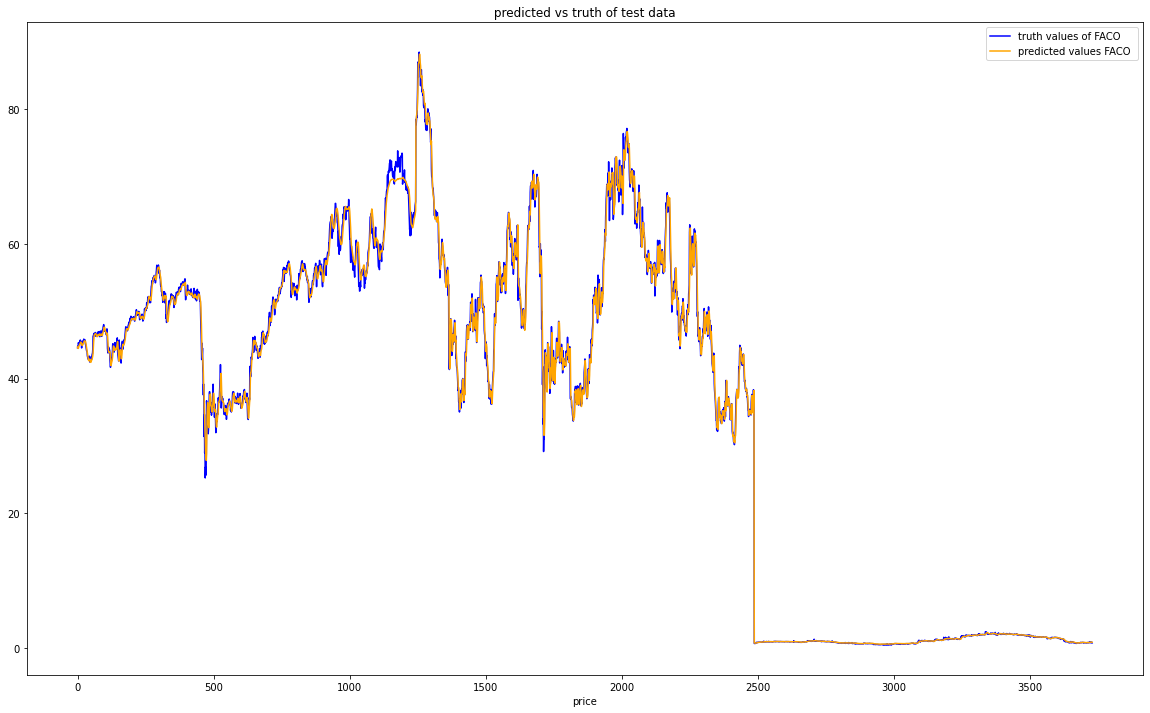

************************************************************************
 Company name is : 'FICO' 
 r2_score of the test data of company  FICO is : 93.94 
 Mean Squared Error of the test data company  FICO is : 1738.03
 Root Mean Squared Error of the test data company  FICO is : 41.69
************************************************************************
 plotting goodness of fit of the test data with the given model of the random 'all' data 


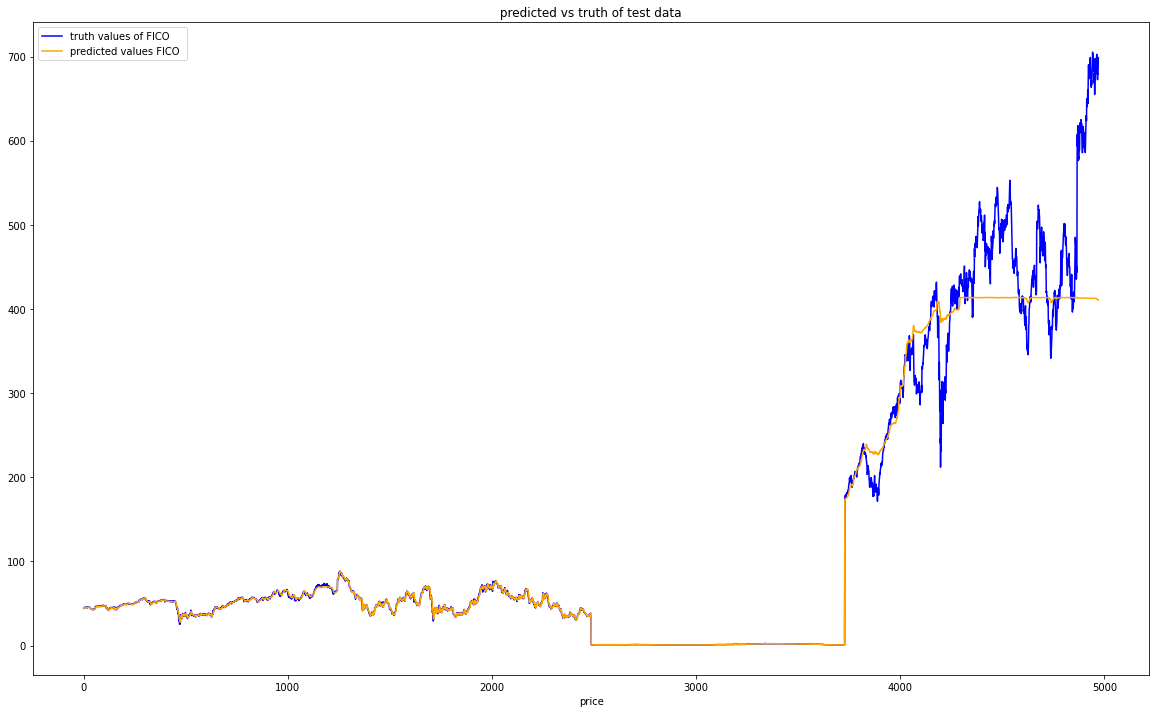

************************************************************************
 Company name is : 'MOG-A' 
 r2_score of the test data of company  MOG-A is : 94.02 
 Mean Squared Error of the test data company  MOG-A is : 1392.70
 Root Mean Squared Error of the test data company  MOG-A is : 37.32
************************************************************************
 plotting goodness of fit of the test data with the given model of the random 'all' data 


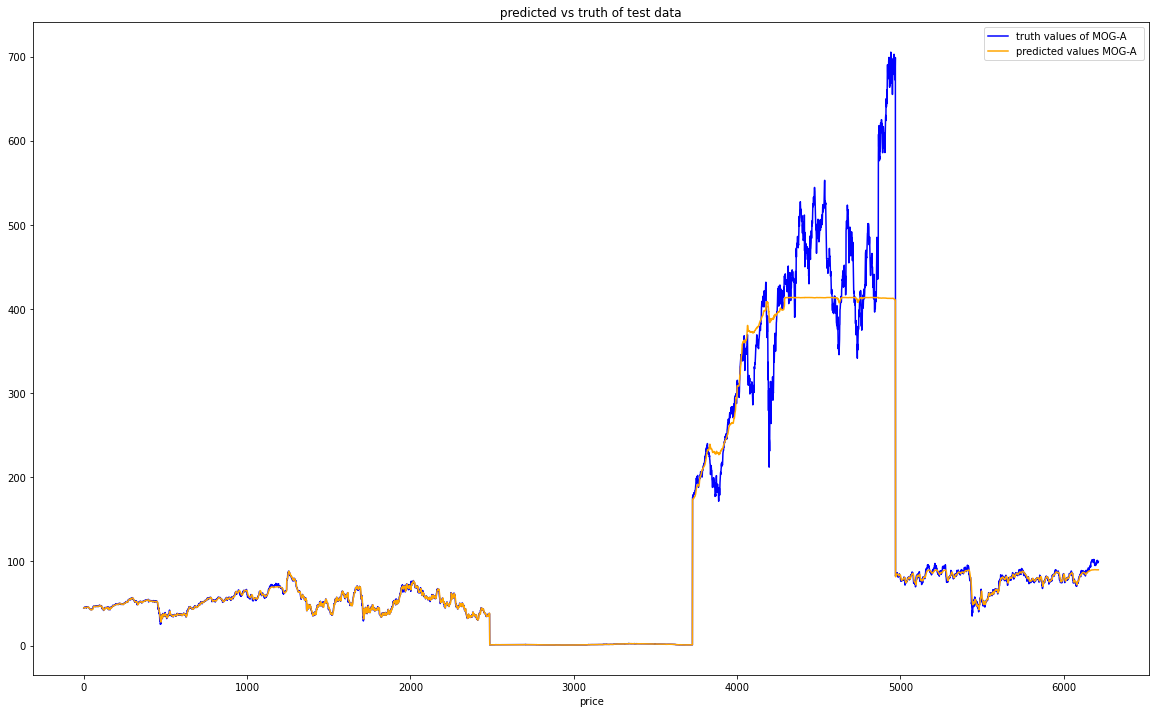

In [598]:
Tester.plot_prediction(unique_symbols[:5],  test_prediction[0], test_prediction[1], 'all' )

In [591]:
new_points_pred_name = unique_symbols[4]
last_point = torch.tensor( np.array( companies_data[new_points_pred_name].sort_values('label').loc[ len(companies_data[new_points_pred_name]) - 1 , range(1,101) ] , dtype = np.float32).reshape(-1,1) , dtype = torch.float32 )
points_before = np.array( combined_df[combined_df['symbol'] == new_points_pred_name ].sort_values('ds')['close'] )

In [592]:
# Now predicting new points
new_points_from_model = Tester.get_new_points(new_points_pred_name, models, last_point = last_point , points_before = points_before, plot = True, n_steps = 50 , val_dataloader= companies_val_dataloader)

testing MOG-A: 100%|██████████| 12/12 [00:00<00:00, 67.59it/s]


 Confidence score is : 91.33 


In [601]:
unique_symbols[8]

'RAMP'

### Saving model

In [594]:
for i in unique_symbols[:5] : torch.save( models[i].state_dict(), f'{i}.pt' )